# Wstęp do programowania zorientowanego obiektowo

Napiszemy program symulujący rozwój populacji. 

In [1]:
import random
import matplotlib.pyplot as plt

In [30]:
class Creature:
    alive = True
    
    def __init__(self, p_death=0.1, p_reproduce=0.1):
            self.p_death = p_death
            self.p_reproduce = p_reproduce
    
    def natural_selection(self):
        if random.random() < self.p_death:
            self.alive = False
            
    def reproduce(self):
        if (random.random() < self.p_reproduce) and self.alive:
            return Creature(self.p_death + random.normalvariate(0, 0.01),
                            self.p_reproduce)
        

In [31]:
def make_population(n=1000, p_death=0.1, p_reproduce=0.1):
    return {Creature(p_death, p_reproduce) for _ in range(n)}

def count_alive(population):
    return len({creature for creature in population if creature.alive})

def natural_selection(population):
    {creature.natural_selection() for creature in population}
    
def reproduce(population):
    return {creature.reproduce() for creature in population} - {None}

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <BarContainer object of 10 artists>)

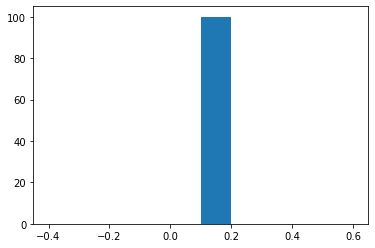

In [33]:
population = make_population(100)
plt.hist([creature.p_death for creature in population])

In [34]:
alive = [count_alive(population)]
for _ in range(100):
    newborns = reproduce(population)
    natural_selection(population)
    population = population | newborns
    alive.append(count_alive(population))
    

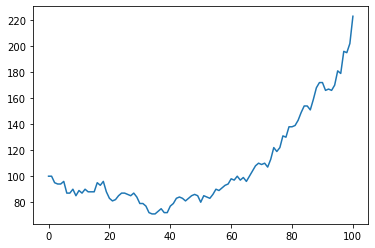

In [35]:
plt.plot(alive)

(array([ 4., 10., 22., 42., 60., 43., 21.,  8.,  7.,  6.]),
 array([0.00111985, 0.01466897, 0.02821808, 0.04176719, 0.0553163 ,
        0.06886541, 0.08241452, 0.09596363, 0.10951274, 0.12306186,
        0.13661097]),
 <BarContainer object of 10 artists>)

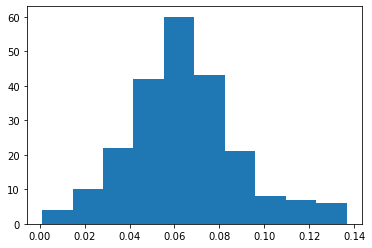

In [37]:
plt.hist([creature.p_death for creature in population if creature.alive])

(array([ 1.,  2.,  9., 13., 16., 24., 12., 11.,  7.,  5.]),
 array([160.91348811, 164.15986225, 167.40623638, 170.65261052,
        173.89898465, 177.14535879, 180.39173292, 183.63810706,
        186.88448119, 190.13085533, 193.37722946]),
 <BarContainer object of 10 artists>)

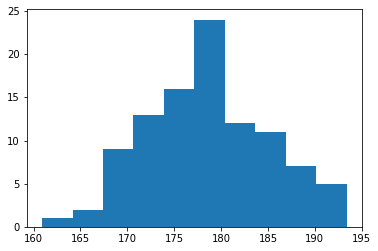

In [29]:
plt.hist([random.normalvariate(178, 6.5) for _ in range(100)])